 Name: Yashika Patil      
 Roll No.: 19339         
 DSE312: EndSem



# Q.19

In [ ]:
# importing libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt

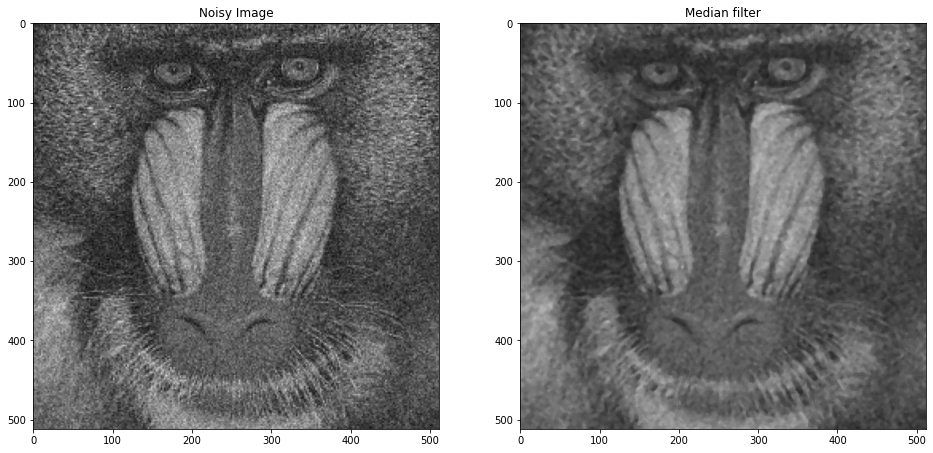

In [ ]:
img = cv2.imread('baboon.tiff')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
median = cv2.medianBlur(img,5)
plt.figure(figsize=(16, 16))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Noisy Image')
plt.subplot(122),
plt.imshow(median,cmap = 'gray')
plt.title('Median filter')
plt.show()

In [ ]:
# Harris Corner Detection

img_gray = np.float32(img_gray)

In [ ]:
detected = cv2.cornerHarris(img_gray, 2, 5, 0.07)

In [ ]:
detected = cv2.dilate(detected, None)

In [ ]:
img[detected>0.01 * detected.max()] = [255,0,0]

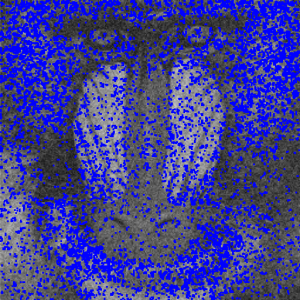

In [ ]:
from google.colab.patches import cv2_imshow

dim = (300,300)

resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
cv2_imshow(resized)

# Q.15

In [ ]:
import cv2
import numpy as np

In [ ]:
# M is the given matrix
M = np.array([0.7679, -0.4938, -0.0234, 0.0067, -0.0852, -0.0915, -0.9065, -0.0878, 0.1827, 0.2988, -0.742, 1.0000])
M = np.reshape(M, (3,4))
print('M:\n', M)
M_normalized = M/M[2][3]
print('Normalized Matrix:\n', M_normalized)

K, R, t, *_ = cv2.decomposeProjectionMatrix(M_normalized)
t = -t[:3] / t[3]
print('\n K: \n', K, '\n')
print('\n R: \n', R, '\n')
print('\n t: \n', t, '\n')

M:
 [[ 0.7679 -0.4938 -0.0234  0.0067]
 [-0.0852 -0.0915 -0.9065 -0.0878]
 [ 0.1827  0.2988 -0.742   1.    ]]
Normalized Matrix:
 [[ 0.7679 -0.4938 -0.0234  0.0067]
 [-0.0852 -0.0915 -0.9065 -0.0878]
 [ 0.1827  0.2988 -0.742   1.    ]]

 K: 
 [[ 0.91302492 -0.0170313   0.01232255]
 [ 0.          0.49835027  0.76747674]
 [ 0.          0.          0.82050273]] 


 R: 
 [[ 0.82845942 -0.559641   -0.02137627]
 [-0.51388111 -0.7444356  -0.42631191]
 [ 0.22266836  0.36416698 -0.90432362]] 


 t: 
 [[ 1.28716441]
 [ 1.99878293]
 [-0.22587429]] 



# Q.16

In [ ]:
image1_kp = [5,4,7,4,7,5,6,6]
image2_kp = [0,0,1,0,1,1,0,1]

In [ ]:
def findHomography(image_1_kp, image_2_kp, matches):
    image_1_points = np.zeros((len(matches), 1, 2), dtype=np.float32)
    image_2_points = np.zeros((len(matches), 1, 2), dtype=np.float32)

    for i in range(0,len(matches)):
        image_1_points[i] = image_1_kp[matches[i].queryIdx].pt
        image_2_points[i] = image_2_kp[matches[i].trainIdx].pt


    homography, mask = cv2.findHomography(image_1_points, image_2_points, cv2.RANSAC, ransacReprojThreshold=2.0)

    return homography

In [ ]:
findHomography(image1_kp, image2_kp, )

TypeError: ignored

Method-2

In [ ]:
!pip3 install opencv-python==3.4.2.17
!pip3 install opencv-contrib-python==3.4.2.17 

In [ ]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10
img1 = [5,4,7,4,7,5,6,6]# queryImage
img2 = [0,0,1,0,1,1,0,1] # trainImage

sift = cv2.xfeatures2d.SIFT_create(4000)

kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches 
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

error: ignored

# Q.17

In [ ]:
!pip3 install opencv-python==3.4.2.17
!pip3 install opencv-contrib-python==3.4.2.17 

     |████████████████████████████████| 25.0 MB 1.4 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 30.6 MB 1.3 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

   
# Detect the SIFT key points and 
# compute the descriptors for the 
# two images
sift = cv2.xfeatures2d.SIFT_create()
keyPointsLeft, descriptorsLeft = sift.detectAndCompute(imgLeft,
                                                       None)
  
keyPointsRight, descriptorsRight = sift.detectAndCompute(imgRight,
                                                         None)
   
# Create FLANN matcher object
FLANN_INDEX_KDTREE = 0
indexParams = dict(algorithm=FLANN_INDEX_KDTREE,
                   trees=5)
searchParams = dict(checks=50)
flann = cv2.FlannBasedMatcher(indexParams,
                              searchParams)
   
  
# Apply ratio test
goodMatches = []
ptsLeft = []
ptsRight = []
   
for m, n in matches:
      
    if m.distance < 0.8 * n.distance:
          
        goodMatches.append([m])
        ptsLeft.append(keyPointsLeft[m.trainIdx].pt)
        ptsRight.append(keyPointsRight[n.trainIdx].pt)

error: ignored

In [ ]:
import cv2

In [ ]:
array1 = np.array([[533.4,140.2],
                 [1047.3, 570.0],
                 [2033.0, 491.8],
                 [139.7, 1639.8],
                 [1555.2 ,2021.5],
                 [927.1, 2869.0],
                 [557.5, 3346.8],
                 [1991.0 ,3184.6]
                 ])

array2 = np.array([[650.6 ,524.9],
                 [1008.2, 795.4],
                 [1849.7, 1080.9],
                 [235.9 ,1730.0],
                 [1510.1 ,2012.5],
                 [933.1, 2784.9],
                 [671.7, 3169.5],
                 [1858.7 ,2938.1]
                 ])


F, mask = cv2.findFundamentalMat(array1,array2,cv2.FM_LMEDS)

In [ ]:
F

array([[ 6.48237893e-08, -2.20183415e-06,  4.06279701e-03],
       [ 2.13077969e-06,  4.94048081e-08, -4.57123910e-03],
       [-4.20171974e-03,  4.10494166e-03,  1.00000000e+00]])

# Q.18

In [ ]:
# Python 3 program to find rank of a matrix
class rankMatrix(object):
    def __init__(self, Matrix):
        self.R = len(Matrix)
        self.C = len(Matrix[0])
         
    # Function for exchanging two rows of a matrix
    def swap(self, Matrix, row1, row2, col):
        for i in range(col):
            temp = Matrix[row1][i]
            Matrix[row1][i] = Matrix[row2][i]
            Matrix[row2][i] = temp
             
    # Function to Display a matrix
    def Display(self, Matrix, row, col):
        for i in range(row):
            for j in range(col):
                print (" " + str(Matrix[i][j]))
            print ('\n')
             
    # Find rank of a matrix
    def rankOfMatrix(self, Matrix):
        rank = self.C
        for row in range(0, rank, 1):
            if Matrix[row][row] != 0:
                for col in range(0, self.R, 1):
                    if col != row:
                         
                        # This makes all entries of current
                        # column as 0 except entry 'mat[row][row]'
                        multiplier = (Matrix[col][row] /
                                      Matrix[row][row])
                        for i in range(rank):
                            Matrix[col][i] -= (multiplier *
                                               Matrix[row][i])
                                                 
            else:
                reduce = True
                 
                # Find the non-zero element
                # in current column
                for i in range(row + 1, self.R, 1):
                     
                    # Swap the row with non-zero
                    # element with this row.
                    if Matrix[i][row] != 0:
                        self.swap(Matrix, row, i, rank)
                        reduce = False
                        break
                         
  
                if reduce:
                     
                    # Reduce number of columns
                    rank -= 1
                     
                    # copy the last column here
                    for i in range(0, self.R, 1):
                        Matrix[i][row] = Matrix[i][rank]
                         
                # process this row again
                row -= 1
    
        return (rank)
 
if __name__ == '__main__':
    """Matrix = [[-0.00310695 -0.0025646 2.96584],
              [-0.028094 -0.00771621 56.3813],
              [13.1905 -29.2007 -9999.79]]"""


    Matrix = [[-0.00310695, -0.0025646, 2.96584],
              [-0.028094, -0.00771621, 56.3813],
              [13.1905, -29.2007, -9999.79]]
    RankMatrix = rankMatrix(Matrix)
    print ("Rank of the Matrix is:",
           (RankMatrix.rankOfMatrix(Matrix)))

Rank of the Matrix is: 3


# Q. 11

Q.21

In [ ]:
import cv2 
import matplotlib.pyplot as plt
import pandas as pd
import skimage
import skimage.io as io

img4 = cv2.imread('binaryshapes.png')

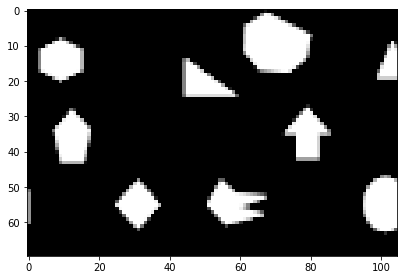

In [ ]:
gray_img4 = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)
io.imshow(img4)

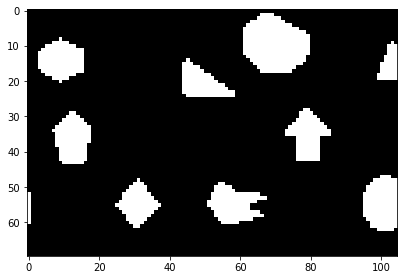

In [ ]:
ret, thresh = cv2.threshold(gray_img4, 100, 255, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU)   
io.imshow(thresh)         
       
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows() 

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


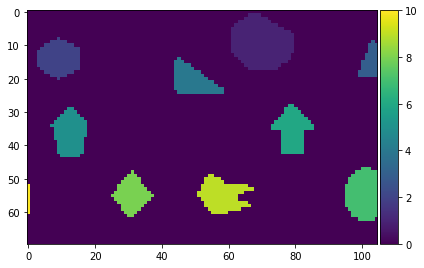

In [ ]:
#connected components

con_components = cv.connectedComponents(thresh, 8)[1]
io.imshow(con_components)

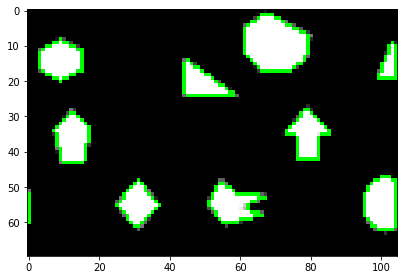

In [ ]:
#bounding boxes

cnt, hrchy = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
rgb = cv.cvtColor(gray_img4, cv.COLOR_GRAY2BGR)
cv.drawContours(rgb, cnt, -1, (0,255,0))
io.imshow(rgb)

In [ ]:
for c in range(len(cnt)):
    x,y,w,h = cv.boundingRect(cnt[c])
    cv.rectangle(rgb , (x, y), (x + w, y + h), (255,0,0), 1)
    cv.putText(rgb, f"{c+1}", (int(x+w/2), int(y+h/2)), cv.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.3, (255,255,0), 1)
    print(f"Eccentricity of box {c+1} is: ", h/w)

Eccentricity of box 1 is:  9.0
Eccentricity of box 2 is:  0.7058823529411765
Eccentricity of box 3 is:  1.0769230769230769
Eccentricity of box 4 is:  1.6
Eccentricity of box 5 is:  1.3636363636363635
Eccentricity of box 6 is:  1.1538461538461537
Eccentricity of box 7 is:  0.7333333333333333
Eccentricity of box 8 is:  1.8333333333333333
Eccentricity of box 9 is:  1.0
Eccentricity of box 10 is:  0.8947368421052632


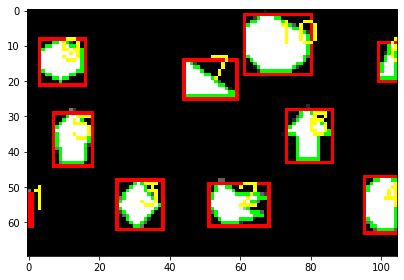

In [ ]:
io.imshow(rgb)

# Q.20

In [ ]:
"""
Gaussian filter is a kind of smoothing filters where the weights are different 
according to the position of the pixel w.r.t the central pixel

if more smoothing is required in horizontal than the vertical, then weights should
be more on the horizontal pixels.

"""